In [28]:
import pandas as pd
import geopandas as gpd
import fiona; help(fiona.open)
pd.set_option('display.max_columns', None)

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

In [29]:
#Load data to aggregate
df = gpd.read_file("data/properties_distance_final.gpkg", layer = "properties_distance_final")



#Is house?
# check if is house
df.loc[df["property_type_id_id"] == 1,  "property_type_id_id"] = 0
df.loc[df["property_type_id_id"] == 3,  "property_type_id_id"] = 1
df = df.rename(columns={'property_type_id_id': 'is_house'})
df

,id,bedrooms,bathrooms,half_bathrooms,lot_size,construction_size,age,is_house,real_age,latitude,longitude,postal_code,settlement,price,balcony,water strorage,air_conditioning,pool,furniture,accasible_for_handicap,first_floor,security,parking_space,kitchen,garden,roof_Garden,service_room,gated_community,price_per_area,price_small,price_per_area_small,high_impact/area,low_impact/area,parks,schools,university,hospital,sport_facility,supermarket,mall,stadium,historic,museum,airport,industry,subway,bus,geometry
0,26054,3.0,2.0,0.0,166.0,166.0,2,1.0,2,19.401676,-99.141939,03400,álamos,5700000.0,False,False,False,False,False,False,False,True,False,False,True,False,True,False,34337.349398,5.700000,0.034337,72.810544,299.379202,1748.073994,269.173155,4428.499666,635.629511,3070.294673,650.886598,1289.354465,2742.044739,1815.041788,1528.727930,6329.453644,2201.328124,632.056443,1513.890366,POINT (2799316.460 825626.670)
1,25524,2.0,2.0,0.0,84.0,84.0,1,0.0,1,19.385737,-99.180502,03840,ampliación nápoles,4704000.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,56000.000000,4.704000,0.056000,65.659354,346.203865,842.624032,185.957353,1433.629401,319.530582,2463.524457,359.267636,1219.704026,305.756023,513.748084,2270.457774,10735.069198,2410.956801,632.345766,1415.365982,POINT (2795312.977 823787.743)
2,25778,3.0,3.0,0.0,127.0,117.0,0,0.0,0,19.407117,-99.159436,06760,roma sur,7927000.0,False,False,False,False,False,False,False,True,False,False,True,False,False,False,62417.322835,7.927000,0.062417,84.225005,331.625655,433.579103,53.190573,2506.464747,401.805876,3284.957622,597.389450,604.530882,2078.745409,1618.765967,1308.181584,7872.154905,2850.309548,282.296640,1327.562262,POINT (2797472.396 826190.712)
3,21174,2.0,2.0,0.0,131.0,131.0,2022,0.0,0,19.372790,-99.282137,05210,granjas navidad,4270000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,32595.419847,4.270000,0.032595,21.743925,122.280351,2088.518323,336.810167,1934.232541,1817.325020,1126.801275,332.484284,1533.421449,10436.777652,1956.384738,2474.152551,21267.741088,3962.161497,8982.270677,1327.490481,POINT (2784696.151 822153.376)
4,12469,2.0,2.0,0.0,91.0,91.0,0,0.0,0,19.362124,-99.287678,05320,cuajimalpa,5155286.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,56651.494505,5.155286,0.056651,17.794848,131.169012,1726.700483,222.406014,2624.147810,849.319424,187.968240,252.619823,1348.294631,10532.782392,1627.285882,1324.469642,22166.170260,2973.479126,9944.284908,845.809000,POINT (2784138.033 820965.262)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,13420,6.0,7.0,3.0,117.0,411.0,1,1.0,1,19.394592,-99.218025,01110,belén,14000000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,119658.119658,14.000000,0.119658,15.851997,87.036439,1432.878354,528.558970,4145.598939,1597.529303,3111.622357,933.074305,1044.847562,4172.631500,1651.479669,168.954946,14160.899585,1563.042796,1862.103499,1765.258618,POINT (2791364.373 824688.219)
11094,2097,3.0,3.0,0.0,255.0,255.0,2,0.0,2,19.341719,-99.229973,01700,tetelpan,10050000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,39411.764706,10.050000,0.039412,21.563199,111.736576,442.968923,818.412253,3314.727340,2261.527280,3754.331122,852.118133,3771.381493,4090.482140,2318.304653,2367.366616,17592.058485,1921.488605,4755.851566,1996.040230,POINT (2790225.895 818828.857)
11095,7567,3.0,2.0,0.0,90.0,90.0,11,0.0,11,19.297200,-99.141280,14370,villa lázaro cárdenas,3500000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,38888.888889,3.500000,0.038889,48.975979,139.714422,1847.699505,111.322863,1213.260132,255.038688,7272.337825,414.885594,1838.750264,1152.939134,898.048938,2816.900399,15

In [30]:
colonias_gdf = gpd.read_file("data/colonias.geojson", layer='colonias')
colonias_gdf["id"]  = colonias_gdf.index
colonias_gdf.to_crs(6362, inplace = True)
colonias_gdf

,nombre,ayocon_rem_pro,vcatas_pro,vconst_pro,vsuelo_pro,geometry,id
0,Pbo. SANTIAGO TEPALCATLALPAN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((2800378.097 808491.958, 280039...",0
1,ZONA RUSTICA,1980.0,3311414.0,929524.0,2381890.0,"MULTIPOLYGON (((2804699.888 802390.165, 280470...",1
2,ZONA RUSTICA,1980.0,3311414.0,929524.0,2381890.0,"MULTIPOLYGON (((2814190.199 803430.671, 281421...",2
3,ROMULO SANCHEZ MIRELES,1985.0,967848.0,732369.0,235478.0,"MULTIPOLYGON (((2795975.832 814188.695, 279597...",3
4,CAMPO DE TIRO LOS GAMITOS,1986.0,1043647.0,830541.0,213107.0,"MULTIPOLYGON (((2789264.123 823095.611, 278926...",4
...,...,...,...,...,...,...,...
1562,JARDINES DE COYOACAN,1985.0,2315267.0,1416045.0,899222.0,"MULTIPOLYGON (((2800691.441 815947.949, 280075...",1562
1563,FUENTES BROTANTES,1988.0,735545.0,398487.0,337058.0,"MULTIPOLYGON (((2794204.043 812033.062, 279422...",1563
1564,ZONA RUSTICA,1980.0,3311414.0,929524.0,2381890.0,"MULTIPOLYGON (((2782382.857 804523.930, 278242...",1564
1565,PUEBLO SAN LORENZO TEZONCO,1956.0,5500639.0,2902492.0,2598147.0,"MULTIPOLYGON (((2807054.584 816068.661, 280705...",1565


In [31]:
join_df = df.sjoin(colonias_gdf, how="inner")
join_df

,id_left,bedrooms,bathrooms,half_bathrooms,lot_size,construction_size,age,is_house,real_age,latitude,longitude,postal_code,settlement,price,balcony,water strorage,air_conditioning,pool,furniture,accasible_for_handicap,first_floor,security,parking_space,kitchen,garden,roof_Garden,service_room,gated_community,price_per_area,price_small,price_per_area_small,high_impact/area,low_impact/area,parks,schools,university,hospital,sport_facility,supermarket,mall,stadium,historic,museum,airport,industry,subway,bus,geometry,index_right,nombre,ayocon_rem_pro,vcatas_pro,vconst_pro,vsuelo_pro,id_right
0,26054,3.0,2.0,0.0,166.0,166.0,2,1.0,2,19.401676,-99.141939,03400,álamos,5700000.0,False,False,False,False,False,False,False,True,False,False,True,False,True,False,34337.349398,5.7000,0.034337,72.810544,299.379202,1748.073994,269.173155,4428.499666,635.629511,3070.294673,650.886598,1289.354465,2742.044739,1815.041788,1528.727930,6329.453644,2201.328124,632.056443,1513.890366,POINT (2799316.460 825626.670),350,ALAMOS,1991.0,1320808.0,856565.0,464243.0,350
105,32419,2.0,2.0,0.0,78.0,78.0,0,0.0,0,19.395339,-99.142944,03400,álamos,3330500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,42698.717949,3.3305,0.042699,72.810544,299.379202,2116.413742,362.767295,4558.128270,686.671856,2470.336237,1095.491465,1439.812482,3366.799349,2456.514458,2214.653492,6733.425575,2444.481369,510.259559,1266.116062,POINT (2799225.133 824925.241),350,ALAMOS,1991.0,1320808.0,856565.0,464243.0,350
132,37749,2.0,1.0,0.0,57.0,57.0,16,0.0,16,19.402344,-99.138770,03400,álamos,2230000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,39122.807018,2.2300,0.039123,72.810544,299.379202,2010.136070,181.328932,4733.510188,419.201978,3046.345367,517.779090,1615.732898,2821.984176,1893.628079,1542.704867,5996.243347,1866.758344,776.139506,1847.140163,POINT (2799646.826 825707.005),350,ALAMOS,1991.0,1320808.0,856565.0,464243.0,350
369,9573,3.0,1.0,0.0,102.0,102.0,33,0.0,33,19.398458,-99.140765,03400,álamos,3800000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,37254.901961,3.8000,0.037255,72.810544,299.379202,2048.752771,197.107772,4647.814161,732.101479,2694.444532,958.823894,1486.885202,3117.269483,2190.793995,1899.471451,6370.524195,2128.634771,447.613388,1520.774014,POINT (2799446.474 825273.994),350,ALAMOS,1991.0,1320808.0,856565.0,464243.0,350
603,6577,2.0,2.0,0.0,123.0,123.0,1,0.0,1,19.394143,-99.142557,03400,álamos,3906000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,31756.097561,3.9060,0.031756,72.810544,299.379202,2242.922006,498.035052,4649.190120,810.629012,2334.666565,1209.414877,1551.249587,3504.890317,2594.218467,2348.919489,6762.778992,2454.344976,486.998339,1318.870494,POINT (2799268.312 824794.065),350,ALAMOS,1991.0,1320808.0,856565.0,464243.0,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,618,2.0,1.0,0.0,55.0,55.0,2,0.0,2,19.356029,-99.152548,04610,xotepingo,2956100.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,53747.272727,2.9561,0.053747,34.610140,101.953968,1821.505578,131.962366,3747.057290,856.912323,1877.291076,200.399224,1765.436552,4054.948321,367.959582,411.085490,10255.993395,1014.050298,561.204728,1250.398226,POINT (2798305.585 820567.015),403,SAN DIEGO CHURUBUSCO,1982.0,20473784.0,9491817.0,10981967.0,403
11003,6718,4.0,2.0,0.0,110.0,110.0,24,0.0,24,19.488589,-99.198050,02459,tezozomoc,2700000.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,24545.454545,2.7000,0.024545,65.221231,183.892056,1700.640796,244.187969,4950.312318,1003.269365,4295.518032,1507.540015,1681.446900,2588.049275,1572.838314,4257.738643,13445.542268,664.708241,318.819130,1835

In [32]:
#pd.set_option('display.max_rows', None)
join_df.groupby("id_right").size().reset_index().sort_values(by=0).reset_index()

,index,id_right,0
0,0,8,1
1,509,1050,1
2,176,356,1
3,508,1049,1
4,503,1042,1
...,...,...,...
696,301,648,228
697,234,480,256
698,175,355,269
699,180,362,274


In [33]:
col_list = join_df.columns[:31].to_list()
col_list.append("id_right")
join_df_1 = join_df[col_list]

join_df_1 = join_df_1.groupby("id_right").mean(numeric_only = True).reset_index()

In [34]:
col_list = join_df.columns[31:].to_list()

join_df_2 = join_df[col_list]
join_df_2 = join_df_2.groupby("id_right").median(numeric_only = True).reset_index()


In [35]:
neighborhood_df = pd.concat([join_df_1,join_df_2.drop("id_right",axis = 1)] ,axis = 1)
#Merge to get geometry of neighborhood
neighborhood_df = pd.merge(neighborhood_df,colonias_gdf, how = "inner", left_on = "id_right", right_on = "id")

neighborhood_df.drop(["index_right","id","id_left","nombre","vcatas_pro_x","vconst_pro_x" ,"vsuelo_pro_x", "ayocon_rem_pro_y","vcatas_pro_y", "vconst_pro_y", "ayocon_rem_pro_x", "vsuelo_pro_y"], axis = 1, inplace = True)



#Normalize data
to_norm = neighborhood_df.drop(["geometry","id_right","price", "price_small"], axis = 1)



#Normalizing min max
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalscalar = preprocessing.StandardScaler()
neighborhood = normalscalar.fit_transform(to_norm)
neighborhood = pd.DataFrame(neighborhood, columns = to_norm.columns)

#Adding geom
neighborhood_df_norm = pd.concat([neighborhood,neighborhood_df[["geometry","id_right","price", "price_small"]]] ,axis = 1)

neighborhood_gpd = gpd.GeoDataFrame(neighborhood_df_norm)
#neighborhood_gpd.geometry = neighborhood_gpd.geometry.centroid 
neighborhood_gpd = neighborhood_gpd[neighborhood_gpd["lot_size"] <= 3]
neighborhood_gpd.to_csv("data/nb_df.csv")
neighborhood_gpd.to_file("data/nb_df.gpkg", driver = "GPKG", geometry = "geometry")
neighborhood_gpd.explore()
neighborhood_gpd

,bedrooms,bathrooms,half_bathrooms,lot_size,construction_size,age,is_house,real_age,latitude,longitude,balcony,water strorage,air_conditioning,pool,furniture,accasible_for_handicap,first_floor,security,parking_space,kitchen,garden,roof_Garden,service_room,gated_community,price_per_area,price_per_area_small,high_impact/area,low_impact/area,parks,schools,university,hospital,sport_facility,supermarket,mall,stadium,historic,museum,airport,industry,subway,bus,geometry,id_right,price,price_small
0,1.607506,3.795655,-0.782058,-0.090367,0.101543,0.274983,1.189032,2.965947,1.189645,-0.527365,-0.280675,-0.319698,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,1.583125,-0.256962,-0.377890,-0.483958,-0.041937,-0.686690,-0.686690,-0.362235,-0.490653,-1.204725,-0.026416,-0.190933,0.217603,-0.937668,-0.393369,-0.428634,0.059922,-0.030999,0.142419,-0.086261,-0.280822,-0.360175,-0.457558,"MULTIPOLYGON (((2793299.849 832180.730, 279330...",8,3.400000e+06,3.400000
1,-0.789660,-1.259302,-0.782058,-0.164097,-0.170815,-0.151405,-0.912587,0.167806,0.928072,-0.362927,-0.280675,-0.319698,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,1.583125,-0.256962,-0.377890,-0.483958,-0.041937,0.468556,0.468556,1.776640,1.564577,-1.733903,0.478983,-0.620477,0.066453,-1.146581,-0.490887,-0.834471,0.076028,-0.273689,-0.313227,-0.352554,-0.992470,-0.777304,-0.857703,"MULTIPOLYGON (((2794357.004 830240.705, 279438...",16,2.539500e+06,2.539500
2,-1.588716,-1.259302,-0.782058,-0.141148,-0.147499,-0.342970,-0.912587,-1.089330,0.628836,-0.654206,-0.280675,-0.319698,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,-1.299618,-0.256962,-0.377890,-0.483958,-0.041937,2.725285,2.725285,0.106282,1.299354,0.423617,2.150015,-0.493853,-1.058884,-0.739339,-0.711208,-0.331797,0.405543,-0.918067,-0.833031,-0.101611,0.366546,-0.586630,0.407494,"MULTIPOLYGON (((2792835.890 828193.326, 279284...",33,6.950000e+06,6.950000
3,5.602784,1.773672,-0.782058,-0.071812,0.169013,-0.342970,1.189032,-1.089330,0.492163,0.801185,-0.280675,-0.319698,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,1.583125,-0.256962,-0.377890,-0.483958,-0.041937,0.409655,0.409655,-0.181528,0.331494,-0.788814,-0.642095,1.123594,0.069091,-0.167126,-0.450806,-0.580005,-0.407965,-0.400672,-0.088077,-1.532088,-0.895682,-0.684277,-0.365462,"MULTIPOLYGON (((2801132.447 826978.129, 280115...",34,7.000000e+06,7.000000
4,0.009395,-0.248311,-0.782058,-0.089390,-0.104834,-0.046353,1.189032,0.857203,0.946030,-0.581633,-0.280675,-0.319698,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,1.583125,-0.256962,-0.377890,-0.483958,-0.041937,-0.353675,-0.353675,1.787594,1.277233,-0.560837,0.465191,-0.118446,-0.554636,-1.216916,-0.175668,-0.721703,0.592396,-0.471636,-0.921843,-0.131758,-0.528284,-0.702726,-0.678414,"MULTIPOLYGON (((2793254.156 830422.310, 279325...",35,4.250000e+06,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.009395,0.560482,1.531052,0.321350,0.125157,-0.177359,1.189032,-0.002516,-1.787337,0.108172,1.553010,-0.319698,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,-0.723069,-0.256962,1.992182,0.465006,-0.041937,-1.409726,-1.409726,-1.083751,-1.166632,3.268392,0.924926,0.253718,-0.359049,0.924474,0.268487,1.497203,-1.110881,0.981668,1.568479,1.463781,2.170619,1.131246,-0.605667,"MULTIPOLYGON (((2796977.276 808648.302, 279697...",1559,5.742400e+06,5.742400
697,0.009395,0.762681,1.145533,-0.047887,0.000835,-0.293534,1.189032,-0.764908,-0.834495,0.677211,-0.280675,3.157024,-0.078457,-0.178423,-0.060755,-0.124474,-0.037796,-0.292728,-0.30405,0.141754,-0.256962,-0.377890,-0.483958,-0.041937,0.499523,0.499523,-0.539563,-0.659075,-0.701303,-0.247120,-1.099828,-0.446943,0.503482,-0.350285,-0.811326,-0.702828,-0.623495,-0.368603,0.021319,-0.692475,-0.63753

(array([ 4., 18., 45., 59., 72., 58., 63., 39., 43., 33., 36., 30., 31.,
        23., 26., 16., 13., 12., 10.,  6.,  4.,  7.,  7.,  4.,  5.,  4.,
         3.,  4.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,  0.,  3.,  2.,  1.,
         0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  535500.        ,  1059741.66666667,  1583983.33333333,
         2108225.        ,  2632466.66666667,  3156708.33333333,
         3680950.        ,  4205191.66666667,  4729433.33333333,
         5253675.        ,  5777916.66666667,  6302158.33333333,
         6826400.        ,  7350641.66666667,  7874883.33333333,
         8399125.        ,  8923366.66666667,  9447608.33333333,
         9971850.        , 10496091.66666667, 11020333.33333333,
        11544575.        , 12068816.66666667, 12593058.33333333,
        13117300.        , 13641541.66666667, 14165783.33333333,
        14690025.        , 15214266.66666667, 15738508.33333333,
        

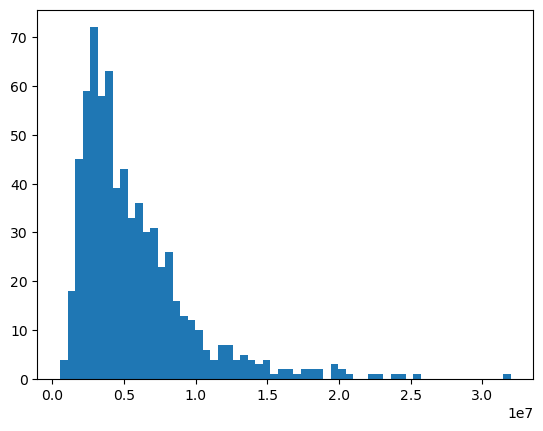

In [36]:
import matplotlib.pyplot as plt
plt.hist(neighborhood_gpd['price'], bins = 60)